In [1]:
import matplotlib.pyplot as plt

import numpy as np

import os
import sys

import yaml

import PhyPraKit as ppk

import pandas as pd
notebook_path = os.path.abspath('')
project_root = os.path.dirname(notebook_path)
sys.path.append(project_root)

#from modules.analyzers import *
#from helpers.read_tar_parquet_to_df import process_parquet_files_from_tar

colors ={'ch1':'tab:blue','ch2':'tab:orange'}

print(sys.path)

['/home/julian/git/coincidence/envs/lib/python312.zip', '/home/julian/git/coincidence/envs/lib/python3.12', '/home/julian/git/coincidence/envs/lib/python3.12/lib-dynload', '', '/home/julian/git/coincidence/envs/lib/python3.12/site-packages', '/home/julian/git/mimoCoRB', '/home/julian/git/coincidence/measurements']


In [2]:
hist_pv_ch1 = np.loadtxt('./3_7_hist/ch1_Ge.hst')
hist_pv_ch2 = np.loadtxt('./3_7_hist/ch2_Na.hst')

hist_my_ch1, bins_my_ch1 = np.histogram(pd.read_csv('3_7_ch1_new2/spectrum.txt',delimiter='	')['ch1_height'],bins=np.linspace(0,5000,5001))
hist_my_ch2, bins_my_ch2 = np.histogram(pd.read_csv('3_7_ch2_new2/spectrum.txt',delimiter='	')['ch2_height'],bins=np.linspace(0,5000,5001))

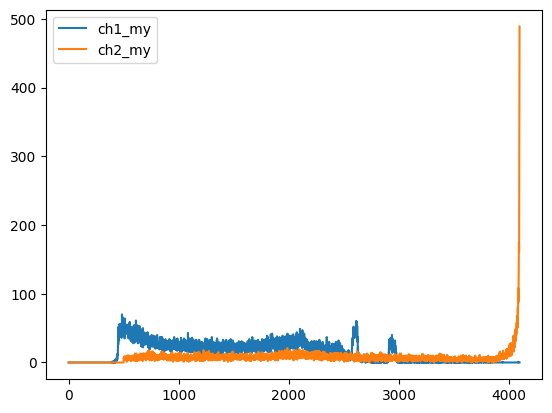

In [8]:
end=4094
plt.plot(bins_my_ch1[0:end], hist_my_ch1[0:end], label='ch1_my', color=colors['ch1'])
plt.plot(bins_my_ch2[0:end], hist_my_ch2[0:end], label='ch2_my', color=colors['ch2'])
plt.legend()
plt.show()

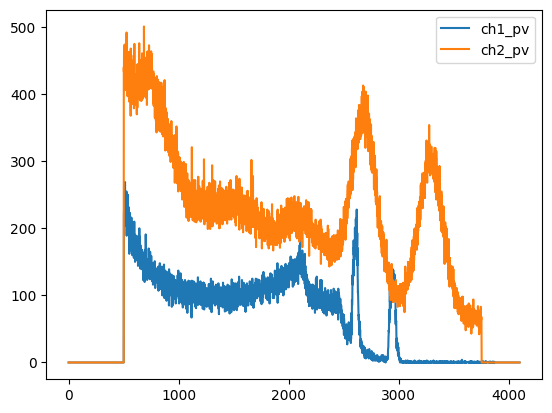

In [43]:
plt.plot(np.linspace(0, len(hist_pv_ch1), len(hist_pv_ch1)), hist_pv_ch1, label='ch1_pv', color=colors['ch1'])
plt.plot(np.linspace(0, len(hist_pv_ch2), len(hist_pv_ch2)), hist_pv_ch2, label='ch2_pv', color=colors['ch2'])
plt.legend()
plt.show()


In [43]:
print(np.max(d1))

7425


In [84]:
my=np.array([2599.7,2933.4])
pv=np.array([2605.5,2944.9])

my_hist=np.loadtxt("my_analyzed_ch1_hist.hst")
pv_hist=np.loadtxt("3_7/ch1_Ge.hst")

max_ind=min(len(my_hist),len(pv_hist))


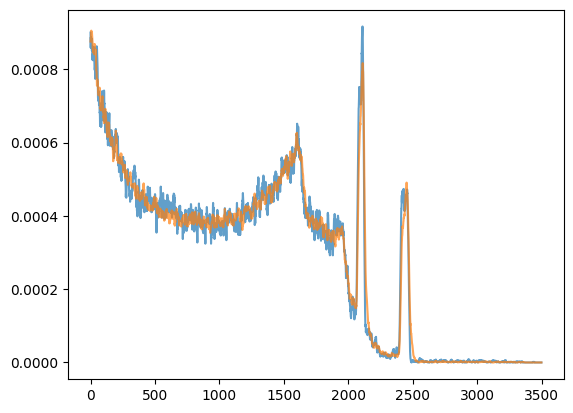

In [88]:
my_norm=my_hist[501:max_ind]/np.sum(my_hist[501:max_ind])
pv_norm=pv_hist[501:max_ind]/np.sum(pv_hist[501:max_ind])

my_norm_s=ppk.meanFilter(my_norm,10)
pv_norm_s=ppk.meanFilter(pv_norm,10)

plt.plot(my_norm_s,alpha=.7)
plt.plot(pv_norm_s,alpha=.7)

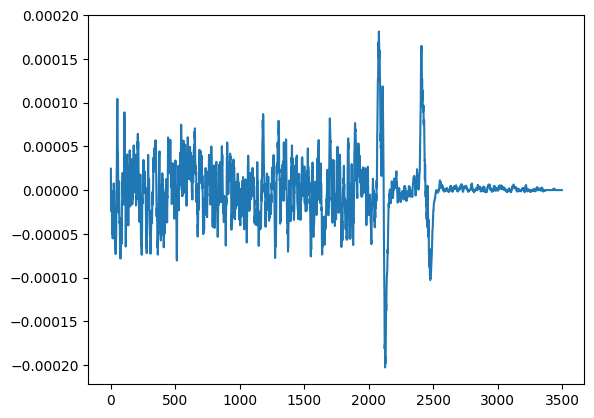

In [90]:
plt.plot(my_norm_s-pv_norm_s)